# PROJECT: 50 STARTUPS PROFIT PREDICTION

## TABLE OF CONTENTS
0. [Introduction](#1.-Introduction)
1. [Dependencies and Libraries](#2.-Dependencies-and-Libraries)
2. [Loading the data](#3.-Loading-the-data)
3. [Basic Information of the Dataset](#4.-Basic-Information-of-the-Dataset)  
   3.1 [Quick Look of the dataset(5 first rows) and a random sample](#3.1.-Quick-Look-of-the-dataset-(5-first-rows)-and-a-random-sample)
   
   3.2 [Shape of the dataset](#3.2.-Shape-of-the-dataset) 
   
   3.3 [Information about variable datatypes](#3.3.-Information-about-variable-datatypes) 
   
   3.4 [Descriptive Statistics of the dataset](#3.4-Descriptive-Statistics-of-the-dataset)
4. [Visualization of the data](#4.-Visualization-of-the-data)

   4.1 [Univariate Plots](#4.1-Univariate-Plots)
   
   4.2 [Multivariate Plots](#4.2-Multivariate-Plots)
5. [Data Cleaning](#5.-Data-Cleaning)

   5.1 [Check for Duplicates](#5.1-Check-for-Duplicates)
   
   5.2 [Check Null Values](#5.2-Check-Null-Values)
   
6. [Feature Engeniering](#6.-Feature-Engeniering)

      6.1 [Encoding the categorical data into Quantitative data](#6.1-Encoding-the-categorical-data-into-Quantitative-data)
   
      6.2 [Creating Dependent And Independent Variables](#6.2-Creating-Dependent-And-Independent-Variables)
   
      6.3 [Split Dataset to Train and Test](#6.3-Split-Dataset-to-Train-and-Test)
   
7. [Linear Regression Model](#7.-Linear-Regression-Model)

      7.1 [Building the Linear Regression on the train Dataset](#7.1-Building-the-Linear-Regression-on-the-train-Dataset)
      
      7.2 [Applying the Trained Model on the Test Dataset to Predict Values](#7.2-Applying-the-Trained-Model-on-the-Test-Dataset-to-Predict-Values)
      
      7.3 [Writing the Equation of Regression](#7.3-Writing-the-Equation-of-Regression)
      
      7.4 [Using the Model for Prediction](#7.4-Using-the-Model-for-Prediction)
      
      7.5 [Evaluation Metrics of the Regression Model](#7.5-Evaluation-Metrics-of-the-Regression-Model)
      
      7.6 [Some Evaluation Metrics Scores](#7.6-Some-Evaluation-Metrics-Scores)
      
8. [Random Forest Regressor (Traning and Testing the model)](#8.-8.-Random-Forest-Regressor-(Traning-and-Testing-the-model)
      
      

# 0. Introduction

This Project analyses the '50 Startup' database which contains data on 50 new companies in 3 states of the United States along with their profits and expenses in 2018. 

This dataset contains the following variables:

State: The state in which the company is located.

R&D Spend: The research and development expenses made by the company in thousands of dollars.

Administration: The administration expenses made by the company in thousands of dollars.

Marketing Spend: The marketing expenses made by the company in thousands of dollars.

Profit: The profits obtained by the company in thousands of dollars.

At the end of the project, we aim to provide a prediction of the profit of these companies by using Machine Learning Algorithms.




# 1. Dependencies and Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split #split model into test and strain data
#from sklearn import svm #support vector machine
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score #used to evaluate the model how it perform on the data set
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

# 2. Loading the data

In [2]:
data = pd.read_csv("50_Startups.csv")

# 3. Basic Information of the Dataset

3.1 Quick Look of the dataset(5 first rows) and a random sample

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.sample(15)

,R&D Spend,Administration,Marketing Spend,State,Profit
27,72107.60,127864.55,353183.81,New York,105008.31
11,100671.96,91790.61,249744.55,California,144259.40
23,67532.53,105751.03,304768.73,Florida,108733.99
38,20229.59,65947.93,185265.10,New York,81229.06
46,1315.46,115816.21,297114.46,Florida,49490.75
36,28663.76,127056.21,201126.82,Florida,90708.19
2,153441.51,101145.55,407934.54,Florida,191050.39
12,93863.75,127320.38,249839.44,Florida,141585.52
49,0.00,116983.80,45173.06,California,14681.40
5,131876.90,99814.71,362861.36,New York,156991.12


3.2 Shape of the dataset

In [5]:
data.shape

(50, 5)

3.3 Information about variable datatypes

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


3.4 Descriptive Statistics of the dataset

In [7]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# 4. Visualization of the data

4.1 Univariate Plots

       4.1.1 Histograms of Quantitative Variables

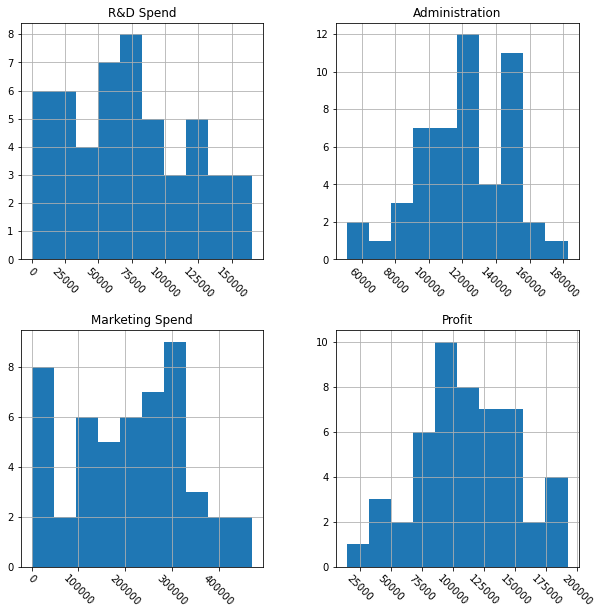

In [8]:
data.hist(xrot=-45, figsize=(10,10))
plt.show()

4.1.2 Density Plots

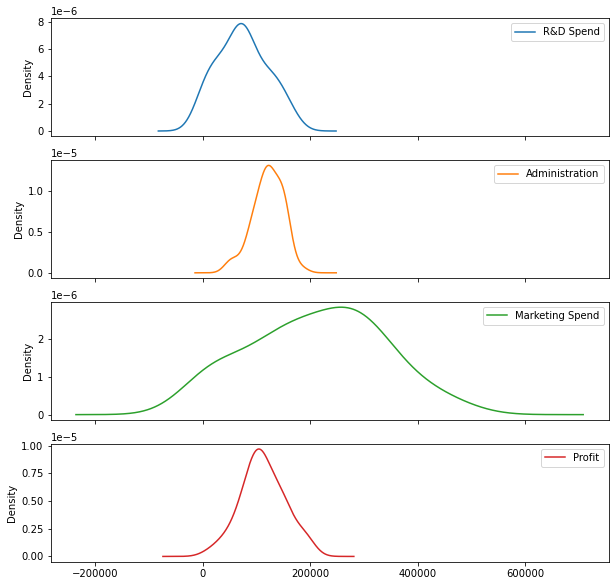

In [9]:
#Viewing the distribution of each variable in the form of density. It is a smoothed version of the histogram and is used in the same concept.
data.plot(kind='density', subplots=True, sharex=True, figsize=(10,10))
plt.show()

4.1.3 Boxplots of the Variables

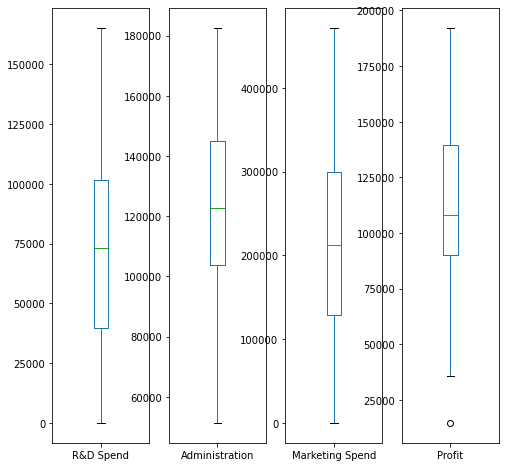

In [10]:
# This will helpcomparing the five number summaries of the variables.
data.plot(kind='box', subplots=True, sharex=True, figsize=(8,8))
plt.show()

4.2 Multivariate Plots

4.2.1 Scatter Plot Matrix, Correlation Matrix plot and HeatMap

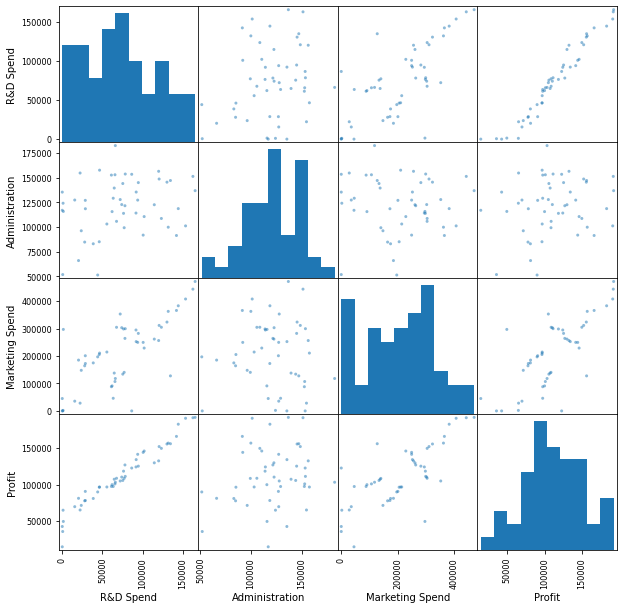

In [11]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize=(10,10))
plt.show()

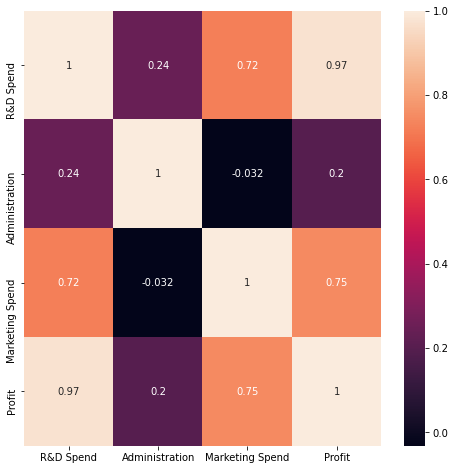

In [12]:
plt.figure(figsize=(8,8))
correlation = data.corr().round(4)
sns.heatmap(data=correlation, annot=True)
plt.show()

In [13]:
print(correlation)

                 R&D Spend  Administration  Marketing Spend  Profit
R&D Spend           1.0000          0.2420           0.7242  0.9729
Administration      0.2420          1.0000          -0.0322  0.2007
Marketing Spend     0.7242         -0.0322           1.0000  0.7478
Profit              0.9729          0.2007           0.7478  1.0000


4.2.2 Visualization between independent and dependent variables

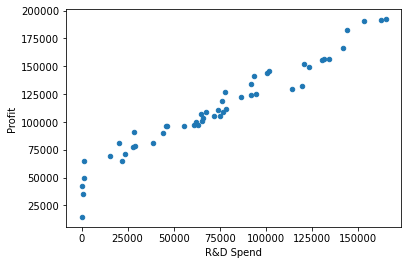

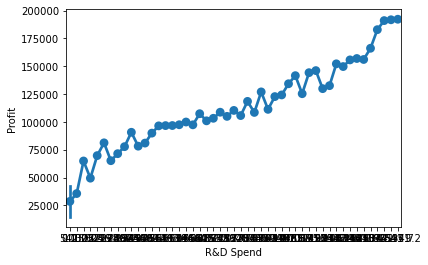

In [14]:
data.plot.scatter(x='R&D Spend', y='Profit')
plt.show()
sns.pointplot(x='R&D Spend', y='Profit', data=data)
plt.show()

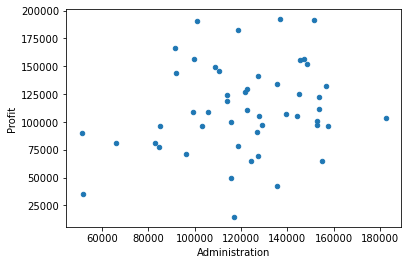

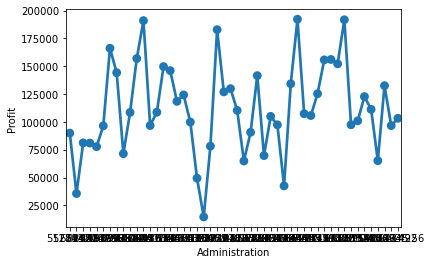

In [15]:
data.plot.scatter(x='Administration', y='Profit')
plt.show()
sns.pointplot(x='Administration', y='Profit', data=data)
plt.show()

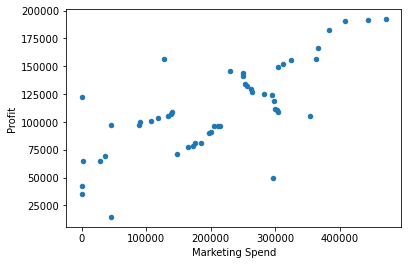

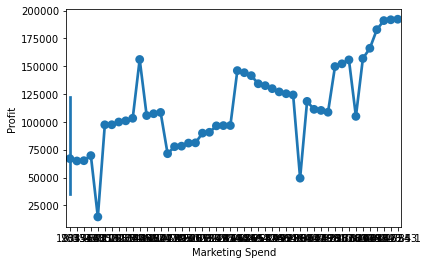

In [16]:
data.plot.scatter(x='Marketing Spend', y='Profit')
plt.show()

sns.pointplot(x='Marketing Spend', y='Profit', data=data)
plt.show()

4.2.3 Relationship Between the Categorical variable and the Quatitative variable

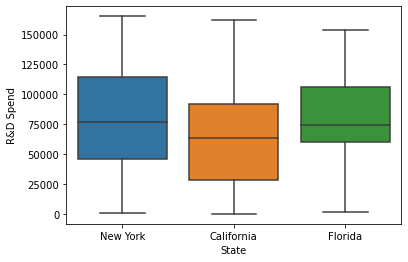

In [17]:
sns.boxplot(x='State', y='R&D Spend', data=data)
plt.show()

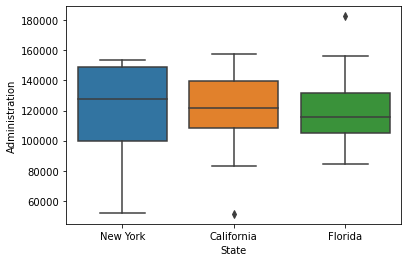

In [18]:
sns.boxplot(x='State', y='Administration', data=data)
plt.show()

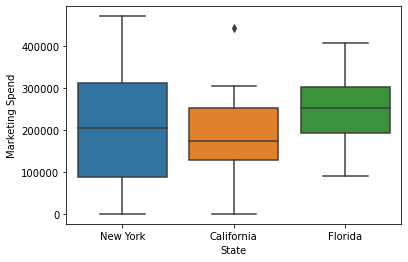

In [19]:
sns.boxplot(x='State', y='Marketing Spend', data=data)
plt.show()

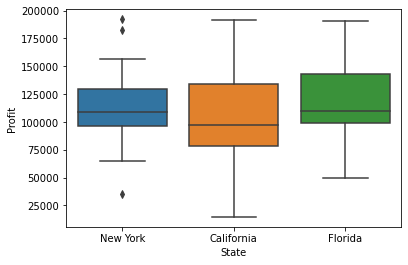

In [20]:
sns.boxplot(x='State', y='Profit', data=data)
plt.show()

It is concluded that the state of New York has more variability in their spenditure in the 3 variables than  California and Florida. Florida seems to have more spenditure in Marketing and R&D than the other two states.
It is observed that in New York, there are 3 atypical data, both with a company that obtained very low profits and two companies that obtained the highest profits in that state.


# 5. Data Cleaning

5.1 Check for Duplicates

In [21]:
#checking again number of rows before removing duplicates
data.shape

(50, 5)

In [22]:
#Call drop_Duplicates on Dataframe to remove duplicates and aasign it back to dataframe
data = data.drop_duplicates()

In [23]:
#checking again number of rows before removing duplicates
data.shape

(50, 5)

There were no duplicates in the dataset.

5.2 Check Null Values

In [24]:
#Checking columns that have duplicates
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

There are no null values in the dataset

# 6. Feature Engeniering

6.1 Encoding the categorical data into Quantitative data

In [25]:
#Find all values of the categorical variable
data['State'].value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

In [26]:
#label encoding. We will convert the categorical variable to quantitative variables. EX:1=yes, 0=NO.
data.replace({'State':{'California':0,'New York':1, 'Florida':2}},inplace=True )

In [27]:
data.sample(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
7,130298.13,145530.06,323876.68,2,155752.60
45,1000.23,124153.04,1903.93,1,64926.08
16,78013.11,121597.55,264346.06,0,126992.93
42,23640.93,96189.63,148001.11,0,71498.49
47,0.00,135426.92,0.00,0,42559.73
2,153441.51,101145.55,407934.54,2,191050.39
10,101913.08,110594.11,229160.95,2,146121.95
15,114523.61,122616.84,261776.23,1,129917.04
12,93863.75,127320.38,249839.44,2,141585.52
28,66051.52,182645.56,118148.20,2,103282.38


6.2 Creating Dependent And Independent Variables

In [28]:
#We need to separate data and label
X = data.drop(columns={'Profit', 'Administration','Marketing Spend'}, axis=1) #axis=1 for removing columns and axis=1 for rows
y = data['Profit']
print(X)
print(y)

    R&D Spend  State
0   165349.20      1
1   162597.70      0
2   153441.51      2
3   144372.41      1
4   142107.34      2
5   131876.90      1
6   134615.46      0
7   130298.13      2
8   120542.52      1
9   123334.88      0
10  101913.08      2
11  100671.96      0
12   93863.75      2
13   91992.39      0
14  119943.24      2
15  114523.61      1
16   78013.11      0
17   94657.16      1
18   91749.16      2
19   86419.70      1
20   76253.86      0
21   78389.47      1
22   73994.56      2
23   67532.53      2
24   77044.01      1
25   64664.71      0
26   75328.87      2
27   72107.60      1
28   66051.52      2
29   65605.48      1
30   61994.48      2
31   61136.38      1
32   63408.86      0
33   55493.95      2
34   46426.07      0
35   46014.02      1
36   28663.76      2
37   44069.95      0
38   20229.59      1
39   38558.51      0
40   28754.33      0
41   27892.92      2
42   23640.93      0
43   15505.73      1
44   22177.74      0
45    1000.23      1
46    1315.46

In [29]:
# For each X, calculate VIF and save in dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.head(5)

,VIF Factor,features
0,1.981168,R&D Spend
1,1.981168,State


There is little risk of multicolinearity since the VIF factors are not significantly large and different.

6.3 Split Dataset to Train and Test

We are splitting the dataset into two set, were the first set for training consist of 80% of the dataset and the second set for testing consists of 20% of the dataset.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40, 2), (10, 2), (40,), (10,))

# 7. Linear Regression Model

7.1 Building the Linear Regression on the train Dataset

In [32]:
lin_reg = LinearRegression()

In [33]:
lin_reg.fit(X_train, y_train)

LinearRegression()

7.2 Applying the Trained Model on the Test Dataset to Predict Values

7.2.1 Predicting Values

Using the trained model on X_test dataset to predict y values.

In [34]:
y_predicted = lin_reg.predict(X_test)
print(y_predicted)

[110241.5860823   88500.49549478  73563.32658379  67016.98773626
 178565.19799364 170452.40347493  50613.38997062 104824.03969998
  51814.24110034 101100.39932772]


7.2.2 Comparing predicted y-values to actual y_test values.

In [35]:
data_y_compared = pd.DataFrame({'actual': y_test, 'Predicted': y_predicted, 'error':y_test-y_predicted})
data_y_compared.head(10)

,actual,Predicted,error
27,105008.31,110241.586082,-5233.276082
35,96479.51,88500.495495,7979.014505
40,78239.91,73563.326584,4676.583416
38,81229.06,67016.987736,14212.072264
2,191050.39,178565.197994,12485.192006
3,182901.99,170452.403475,12449.586525
48,35673.41,50613.389971,-14939.979971
29,101004.64,104824.039700,-3819.399700
46,49490.75,51814.241100,-2323.491100
31,97483.56,101100.399328,-3616.839328


7.3 Writing the Equation of Regression

7.3.1 Finding the Coefficients (m1,m2,m3,m4,m5)

In [36]:
lin_reg.coef_
print('Coefficients are:', lin_reg.coef_)

Coefficients are: [  0.83319692 556.44829686]


7.3.2 Finding the y_intercept

In [37]:
lin_reg.intercept_
print('intercept(b) is:', lin_reg.intercept_)

intercept(b) is: 49605.307281203146


7.4 Using the Model for Prediction

Finding the Predicted value of Given Independent Variables

In [38]:
#lin_reg.predict([[142107.34, 91391.77, 366168.42, 2]])
lin_reg.predict([[142107.34, 2]])

array([169121.60241555])

7.5 Evaluation Metrics of the Regression Model

In [39]:
score1=round(r2_score(y_test, y_predicted)*100,2)
print('The score is:', score1,'%')

The score is: 96.11 %


7.6 Some Evaluation Metrics Scores

In [40]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_predicted))

Mean Absolute Error: 8173.5434897566065


In [41]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_predicted))

Mean Squared Error: 88204845.87942658


In [42]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_predicted)))

Root Mean Squared Error: 9391.74349518909


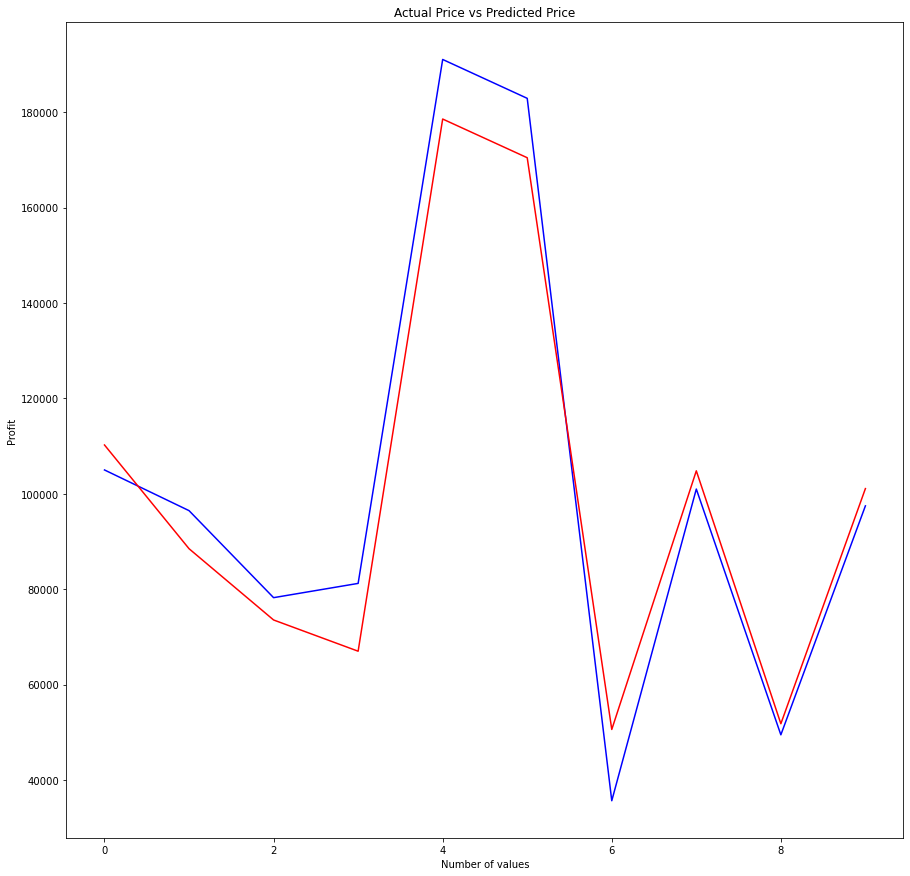

In [43]:
#Comparing actual and predicted values in a plot
y_test = list(y_test)
plt.figure(figsize=(15,15))
plt.plot(y_test, color="blue", label = "Actual Value")
plt.plot(y_predicted, color="red", label = "Predicted Value")
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Profit')
plt.show()

# 8. Applying Another Model: Random Forest Regressor 

In [44]:
# traing the model using the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100)

In [45]:
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [46]:
#prediction on test data
data_test_prediction = regressor.predict(X_test)
print(data_test_prediction)

[109831.4054    93894.421     80418.0974    67536.275225 180872.6
 167021.9861    54774.15593  104824.2038    56156.50383   98526.4088  ]


In [47]:
#regressor.predict([[142107.34, 91391.77, 366168.42, 2]])
regressor.predict([[142107.34, 2]])

array([162583.4004])

In [48]:
data_y_compared = pd.DataFrame({'actual': y_test, 'Predicted': data_test_prediction, 'error':y_test-data_test_prediction})
data_y_compared.head(10)

,actual,Predicted,error
0,105008.31,109831.405400,-4823.095400
1,96479.51,93894.421000,2585.089000
2,78239.91,80418.097400,-2178.187400
3,81229.06,67536.275225,13692.784775
4,191050.39,180872.600000,10177.790000
5,182901.99,167021.986100,15880.003900
6,35673.41,54774.155930,-19100.745930
7,101004.64,104824.203800,-3819.563800
8,49490.75,56156.503830,-6665.753830
9,97483.56,98526.408800,-1042.848800


In [49]:
#comparing these values with the actual values
error_score = metrics.r2_score(y_test,data_test_prediction)*100
print("R squared error:", error_score,"%")

R squared error: 95.57968434174575 %


In [50]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,data_test_prediction))

Mean Absolute Error: 7996.586283500017


In [51]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test,data_test_prediction))

Mean Squared Error: 100289109.32140358


In [52]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,data_test_prediction)))

Root Mean Squared Error: 10014.445033121085


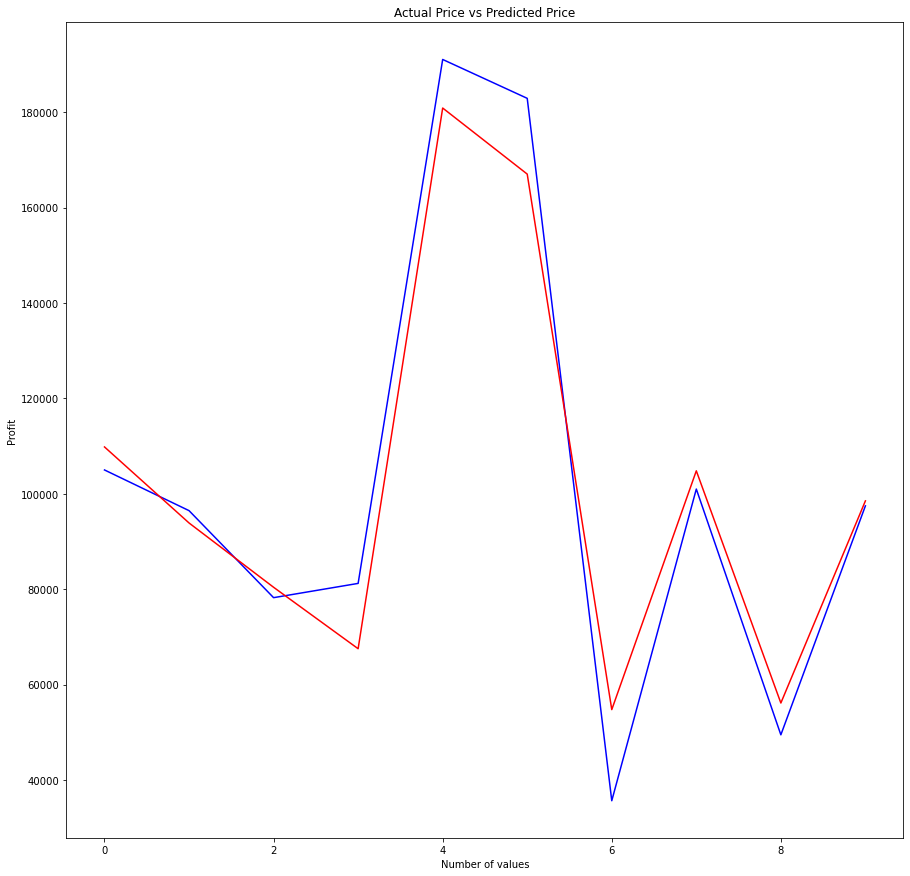

In [53]:
#Comparing actual and predicted values in a plot
y_test = list(y_test)
plt.figure(figsize=(15,15))
plt.plot(y_test, color="blue", label = "Actual Value")
plt.plot(data_test_prediction, color="red", label = "Predicted Value")
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Profit')
plt.show()

### Model comparison

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, prediction):
    mae = mean_absolute_error(y, prediction)
    mse = mean_squared_error(y, prediction)
    rmse = np.sqrt(mean_squared_error(y, prediction))
    r_squared = r2_score(y, prediction)
    return mae, mse, rmse, r_squared

In [55]:
models = pd.DataFrame(columns=["Models","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

In [56]:
#y_predicted = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, y_predicted)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Models": "Linear Regression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 8173.5434897566065
MSE: 88204845.87942658
RMSE: 9391.74349518909
R2 Score: 0.9611230706890402
------------------------------
RMSE Cross-Validation: 9650.241855434013


In [57]:
#data_test_prediction = regressor.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, data_test_prediction)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(regressor)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Models": "Random Forest Regresser","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 7996.586283500017
MSE: 100289109.32140358
RMSE: 10014.445033121085
R2 Score: 0.9557968434174575
------------------------------
RMSE Cross-Validation: 22379.48999171587


In [58]:
models.sort_values(by="RMSE (Cross-Validation)")

,Models,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
0,Linear Regression,8173.543490,8.820485e+07,9391.743495,0.961123,9650.241855
1,Random Forest Regresser,7996.586284,1.002891e+08,10014.445033,0.955797,22379.489992


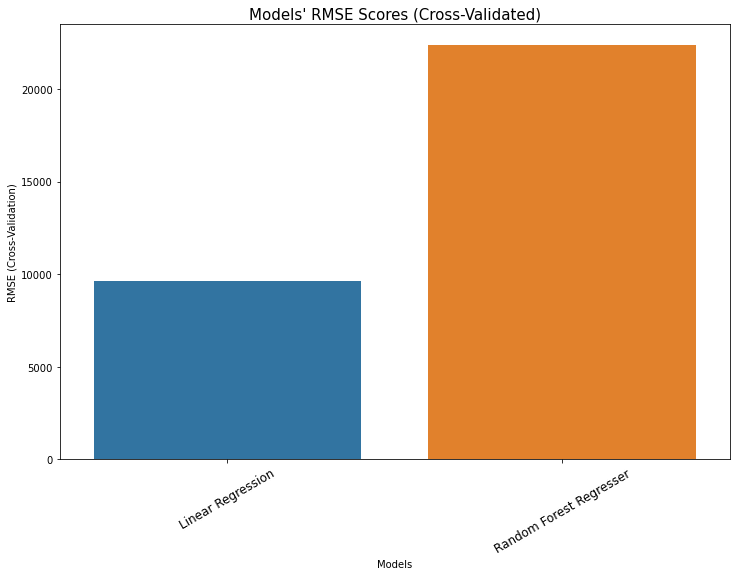

In [60]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Models"], y=models["RMSE (Cross-Validation)"])
plt.title("Models' RMSE Scores (Cross-Validated)", size=15)
plt.xticks(rotation=30, size=12)
plt.show()